<a href="https://colab.research.google.com/github/ternce-bennett/london_airbnb_housing-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 London Airbnb vs Housing Affordability Analysis
This project investigates how the number and pricing of Airbnb listings might relate to rent prices in London boroughs.

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Airbnb listings data
df = pd.read_csv("listings.csv")

# Display the first few rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN
3,264779,Refurbished Two Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44355,-0.02309,Entire home/apt,144.0,3,36,2025-04-10,0.30,11,328,7,NaN
4,264780,Spacious refurbished 2 bedroom apt with balcony,1389063,Sue,NaN,Lewisham,51.44333,-0.02307,Entire home/apt,157.0,3,54,2024-12-29,0.35,11,255,4,NaN


In [8]:
# Keep only relevant columns
columns = ['neighbourhood', 'price']
df = df[columns]

# Clean price column: remove currency symbols and convert to float, coercing errors
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows where price is NaN after conversion
df.dropna(subset=['price'], inplace=True)

# Group by borough and calculate:
# - number of listings
# - average nightly price
airbnb_summary = df.groupby('neighbourhood').agg(
    listings_count=('price', 'count'),
    average_price=('price', 'mean')
).reset_index()

airbnb_summary.head()

,neighbourhood,listings_count,average_price
0,Barking and Dagenham,590,108.145763
1,Barnet,1788,135.981544
2,Bexley,536,107.238806
3,Brent,2082,169.424111
4,Bromley,645,117.069767


In [9]:
# Add sample (mock) rent data
# You can replace this later with real rent data by borough
mock_rent_data = pd.DataFrame({
    'neighbourhood': airbnb_summary['neighbourhood'],
    'median_rent': [1400 + i * 10 for i in range(len(airbnb_summary))]  # example only
})

# Merge Airbnb data with mock rent data
merged = airbnb_summary.merge(mock_rent_data, on='neighbourhood')
merged.head()

,neighbourhood,listings_count,average_price,median_rent
0,Barking and Dagenham,590,108.145763,1400
1,Barnet,1788,135.981544,1410
2,Bexley,536,107.238806,1420
3,Brent,2082,169.424111,1430
4,Bromley,645,117.069767,1440


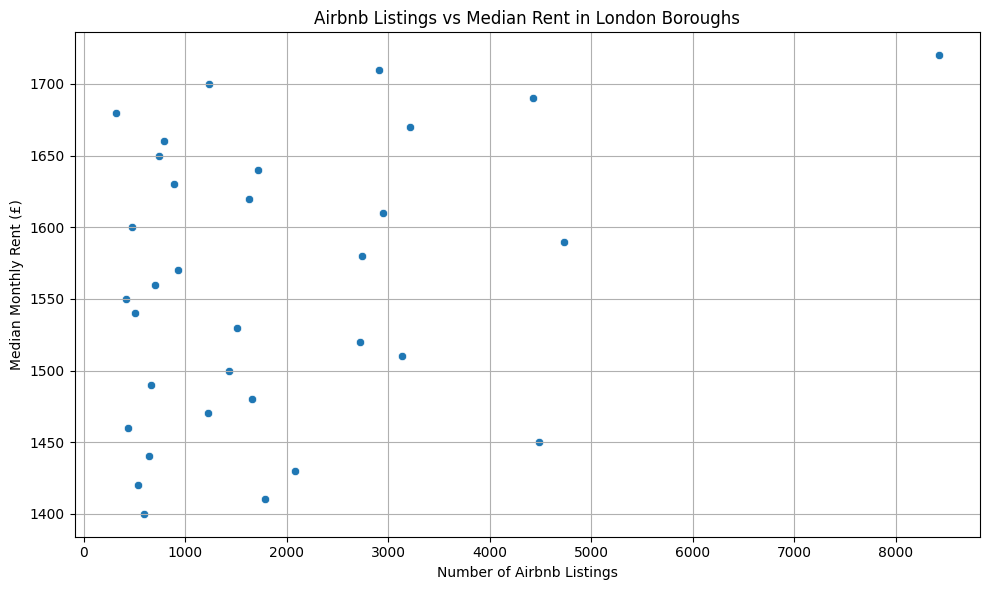

In [10]:
# Plot 1: Listings count vs Median Rent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='listings_count', y='median_rent')
plt.title('Airbnb Listings vs Median Rent in London Boroughs')
plt.xlabel('Number of Airbnb Listings')
plt.ylabel('Median Monthly Rent (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

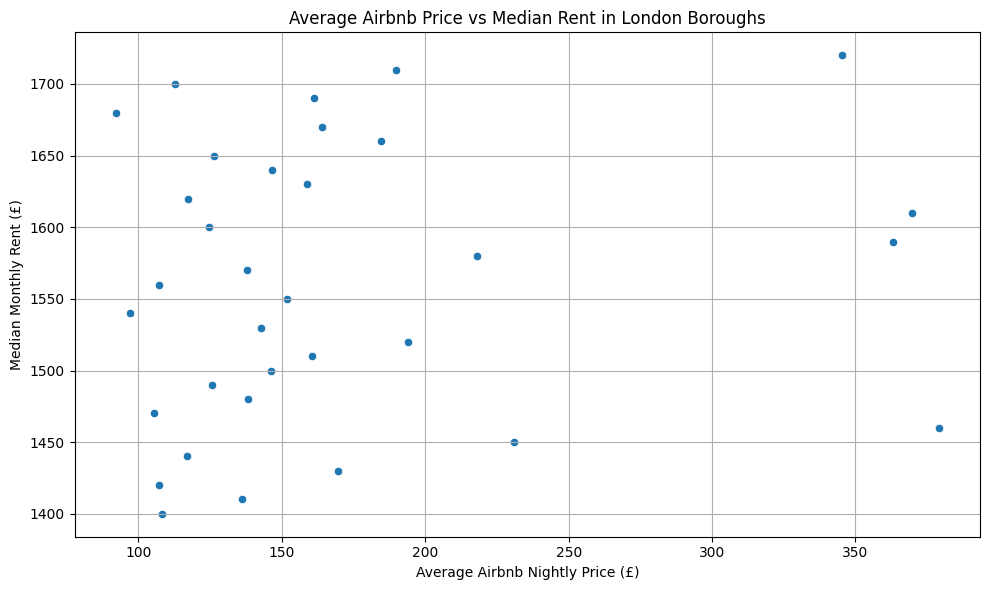

In [11]:
# Plot 2: Average Airbnb Price vs Median Rent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='average_price', y='median_rent')
plt.title('Average Airbnb Price vs Median Rent in London Boroughs')
plt.xlabel('Average Airbnb Nightly Price (£)')
plt.ylabel('Median Monthly Rent (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Correlation analysis
correlation_listings = merged['listings_count'].corr(merged['median_rent'])
correlation_price = merged['average_price'].corr(merged['median_rent'])

print(f"Correlation between Airbnb listings and rent: {correlation_listings:.2f}")
print(f"Correlation between Airbnb price and rent: {correlation_price:.2f}")

Correlation between Airbnb listings and rent: 0.32
Correlation between Airbnb price and rent: 0.14


In [ ]:
from google.colab import files
uploaded = files.upload()
